## Plots of resonance/novelty

In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import matplotlib.font_manager
import datetime as dt

In [2]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [5]:
file = "tweets_emo_date_W3"
smooth = True
span = 150

if smooth:
    filename = os.path.join("..","idmdl", "smoothed", f"{file}_smoothed_{span}.csv")
else:
    filename = os.path.join("..","idmdl", f"{file}.csv")

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,smoothed_transience,smoothed_novelty,smoothed_resonance
0,0,2019-01-01,"[0.14579328851783585, 0.12960305757345764, 0.3...",0.000000,0.006014,0.000000,0.000000,0.000354,0.000000,0.001503,0.000731,0.000246
1,1,2019-01-02,"[0.08907176251645407, 0.10464972084789613, 0.3...",0.000000,0.001875,0.000000,0.000000,0.001106,0.000000,0.001479,0.000743,0.000235
2,2,2019-01-03,"[0.08783947459684412, 0.1068106467834229, 0.30...",0.000000,0.001088,0.000000,0.000000,0.000504,0.000000,0.001455,0.000755,0.000224
3,3,2019-01-04,"[0.08889385312331158, 0.11508794314450768, 0.2...",0.002576,0.000583,0.001993,0.002188,0.000121,0.001154,0.001431,0.000767,0.000214
4,4,2019-01-05,"[0.09640353072625699, 0.12730145251396646, 0.2...",0.001868,0.001376,0.000492,0.001108,0.000879,0.000994,0.001408,0.000779,0.000203


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
# event_dict is a dictionary of the events to be plotted
covid_dict = {
              "first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
            #   "coronapas launced": dt.datetime(2021, 5, 27),
              # "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              # "all restrictions lifted": dt.datetime(2021, 9, 10),
              }
holidays_dict = {
  "christmas 19": dt.datetime(2019,12,24),
  "new year 19": dt.datetime(2019,12,31),
  "christmas 20": dt.datetime(2020, 12, 24),
  "new year 20": dt.datetime(2020, 12, 31)
}


In [8]:
def plot_novelty_resonance(df, measure, axis_color='darkgrey', smooth=None, event_dict=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    # palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    palette = sns.color_palette("rocket")

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
      raw_color = palette[5]
      # smooth_color = palette[0]
      smooth_color = palette[1]
    else:
      raw_color = palette[0]


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    

    x = df['date']
    y = df[measure]

    plt.plot(x, y, color=raw_color, alpha=0.8, label='Raw signal')

    if smooth:
      y_smoothed = df[f'smoothed_{measure}']
      plt.plot(x, y_smoothed, color=smooth_color, linewidth=3, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          # plt.plot(time, y_smoothed[x == time],
          #         marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          plt.axvline(x=time, color='red', linestyle='--')
          plt.text(time, 0.007, #y_smoothed[x == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)


    # axis
    ax1.set(xlabel="")

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")#, alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', labelsize=20, colors=axis_color)
    ax1.yaxis.label.set_color(axis_color)
    plt.xticks(rotation=90)
    every_nth = 3
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)

    plt.ylabel(measure.capitalize(), color=axis_color, size=35)

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

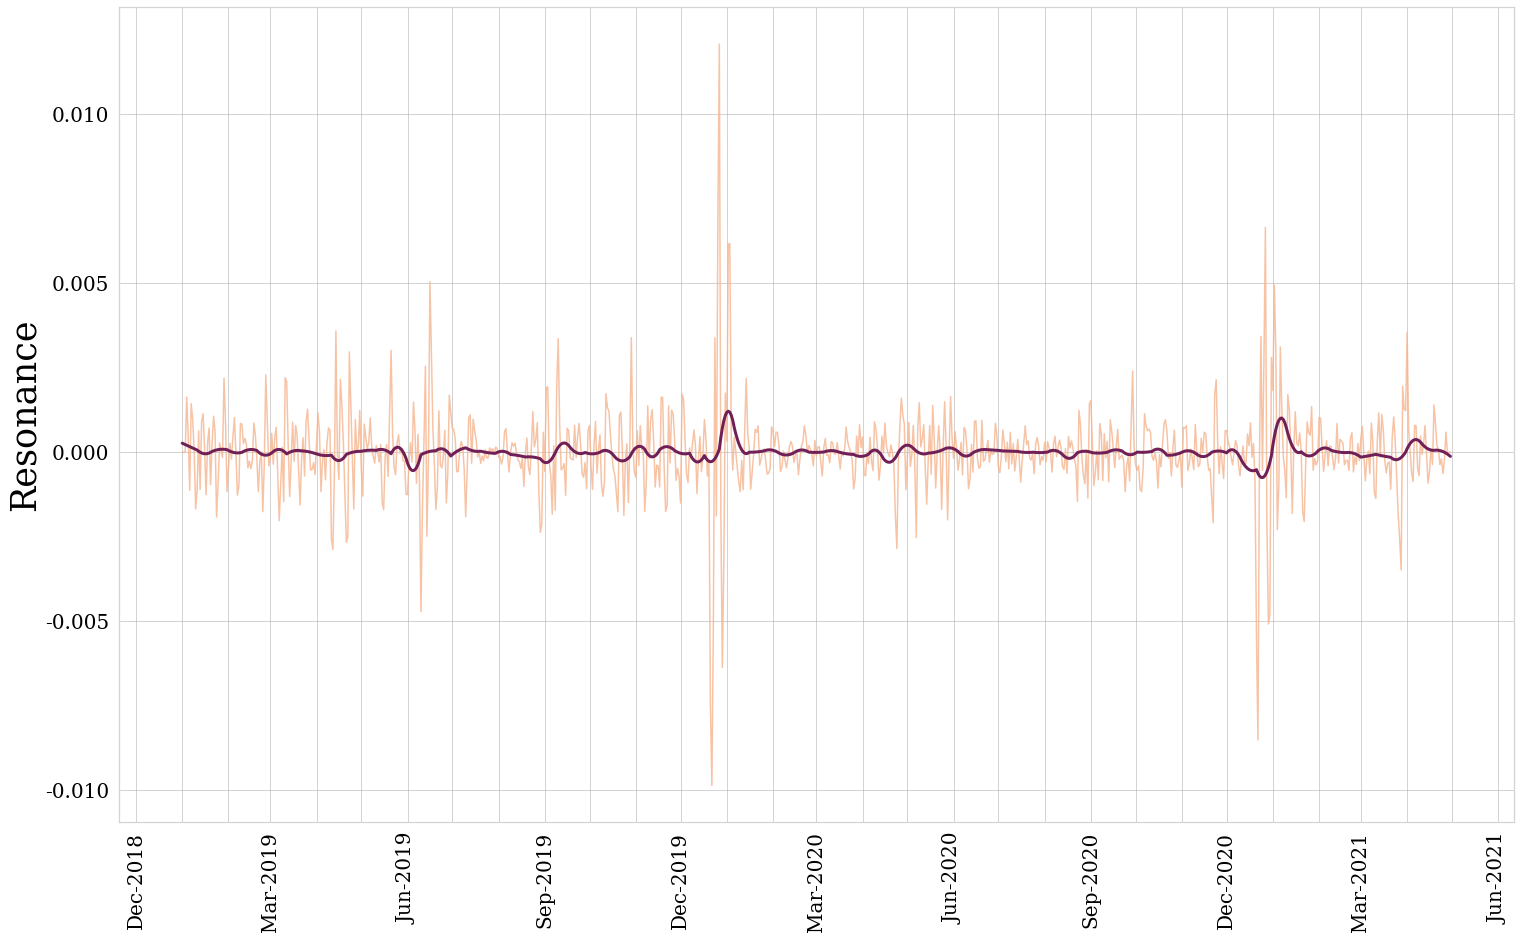

In [24]:
measure='resonance'
save = False
smooth = True

if smooth:
    plot_name = f'../fig/{file}_{measure}_wsmooth{span}.png'
else:
    plot_name = f'../fig/{file}_{measure}.png'

plot_novelty_resonance(df,measure=measure, smooth=smooth, axis_color='black', event_dict=None,
                       save_fig=save, plot_name=plot_name)

In [10]:
def plot_two_signals(measure: str, df1, df2, label1=None, label2=None, fontsize=20, plot_name=None):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=True, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    
    plt.plot(df1["date"], df1[measure], color="#0072B2", alpha=0.7, linewidth=2, label = label1)
    plt.plot(df2["date"], df2[measure], color="#ef6d4c", alpha=0.5, linewidth=2, label = label2)
    
    if label1 and label2:
        plt.legend()
    ax1.xaxis_date()
    date_form = mdates.DateFormatter("%b-%Y")
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', colors='black')
    plt.ylabel(measure.capitalize(), color="black", size=35)
    
    if plot_name:
        plt.savefig(plot_name)
    plt.show()

In [11]:
pol_file = os.path.join("..", "idmdl", "tweets_pol_date_W3.csv")
pol = pd.read_csv(pol_file)
pol["date"] = pd.to_datetime(pol["date"])

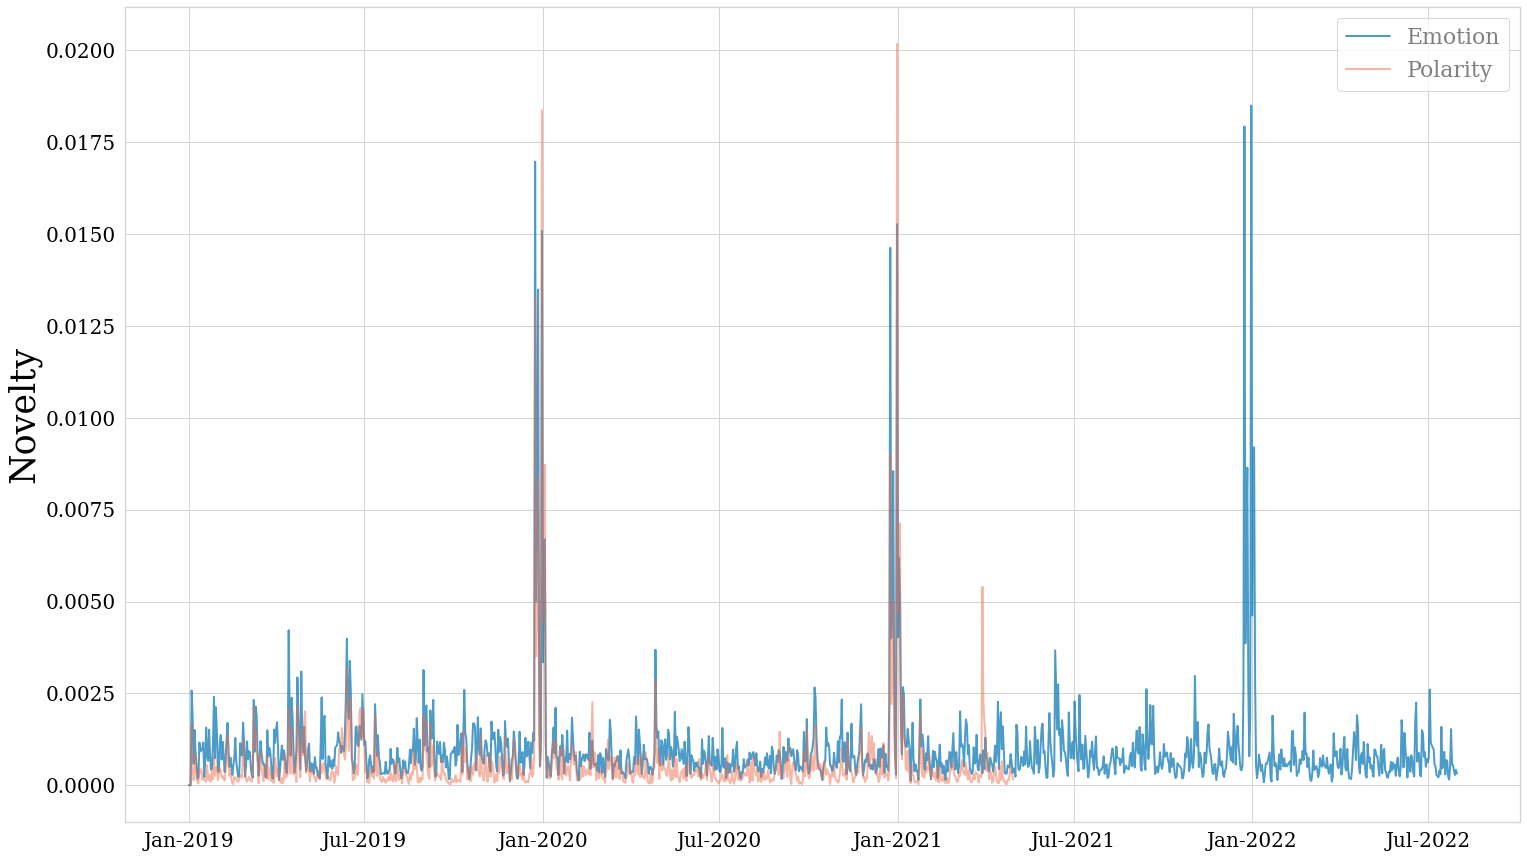

In [12]:
measure = "novelty"
plot_name = None

plot_two_signals(measure, df, pol, label1='Emotion', label2='Polarity', 
                 plot_name=plot_name
                )

In [13]:
emo_only_file = os.path.join("..", "idmdl", "tweets_emo_only_date_W3.csv")
emo_only = pd.read_csv(emo_only_file)
emo_only["date"] = pd.to_datetime(emo_only["date"])

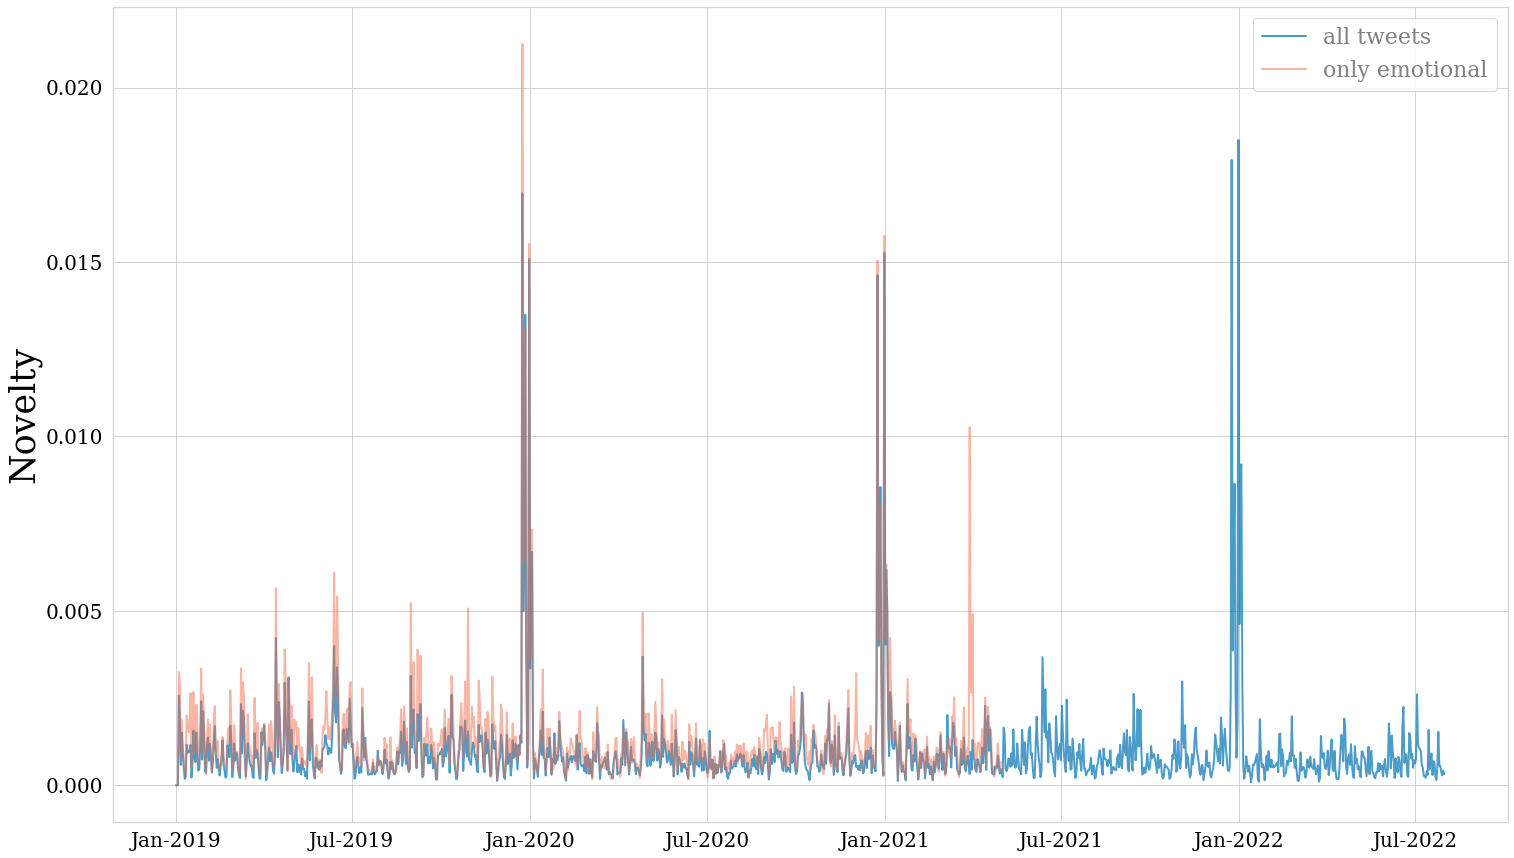

In [14]:
measure = "novelty"
plot_name = None

plot_two_signals(measure, df, emo_only, label1='all tweets', label2='only emotional', 
                 plot_name=plot_name)

## Emotions driving the effect

In [15]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [16]:
all_emo_dfs = []
for label in labels:
    filename = os.path.join("..", "idmdl", f"tweets_emo_date_W3_no_{label[:4]}.csv")
    df = pd.read_csv(filename)
    df["date"] = pd.to_datetime(df["date"])
    all_emo_dfs.append(df)
    # plot_novelty_resonance(df, label)
    # plot_novelty_resonance(df, label, save_fig=True, plot_name=f"../fig/res_nov_no_{label[:4]}.png")
all_emo = pd.read_csv(os.path.join("..", "idmdl", "tweets_emo_date_W3.csv"))
all_emo["date"] = pd.to_datetime(all_emo["date"])
all_emo_dfs.append(all_emo)



In [20]:
#Code from newsFluxus Github. 
path = os.path.join("..", "newsFluxus", "src")
sys.path.append(path)
import news_uncertainty

In [21]:
def plot_all_excluded(dfs:list, measure:str, 
                      ymin:float, ymax:float, 
                      smooth: bool=True, span: int=150, 
                      stacked: bool=False, plot_name: str=None, 
                      labels: list=["Glæde/Sindsro",
                                    "Tillid/Accept",
                                    "Forventning/Interrese",
                                    "Overasket/Målløs",
                                    "Vrede/Irritation",
                                    "Foragt/Modvilje",
                                    "Sorg/trist",
                                    "Frygt/Bekymret",
                                    "All emotions included"]):
    
    # set basic settings
    fig, axs = plt.subplots(4,2, figsize = (22,28))
    themes.theme_minimal(grid=True, ticks=False, fontsize=20)

    # Loop over each signal
    k, j = 0, 0
    for i, emotion in enumerate(labels):
        x = dfs[i]["date"]
        y = dfs[i][measure]
        if stacked: # Plots in one long column
            axs[k, j].plot(x, y, linewidth = 0.4, 
                           color="Blue", label=emotion)
            x = dfs[-1]["date"]
            y = dfs[-1][measure]
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[0], label='all')
        else: # Plots side by side
            axs[k, j].plot(x, y, label = f'{emotion} excluded', linewidth = 0.5, color="#0072B2")
        if smooth: # Smooth signal and plot
            dfs[i][f"smoothed_{measure}"] = news_uncertainty.adaptive_filter(dfs[i][measure], span=span)
            axs[k, j].plot(x, dfs[i][f"smoothed_{measure}"],  linewidth = 1.5, color="Black")
        
        # axes; make into dates, set n_ticks, rotate
        date_form = mdates.DateFormatter("%b-%Y")
        axs[k, j].xaxis.set_major_formatter(date_form)
        axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(8))
        axs[k, j].axis(ymin=ymin, ymax=ymax, xmin=dt.datetime(2018, 12, 20), xmax=dt.datetime(2021, 5, 3))
        axs[k, j].set_title(f'{emotion} excluded', fontdict = {"fontsize": 22}, color = "Black")
        axs[k, j].tick_params(axis='x', which='major', labelsize=16,  colors="black")
        axs[k, j].tick_params(axis='y', which='major', labelsize=16, colors="black")

        j += 1
        if j > 1:
            k += 1
            j = 0
    fig.suptitle(measure.capitalize(), fontsize=30, color="Black", y=0.92)
    plt.subplots_adjust(hspace=0.3)
    # plt.tight_layout()

    if plot_name:
        plt.savefig(plot_name)
    plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


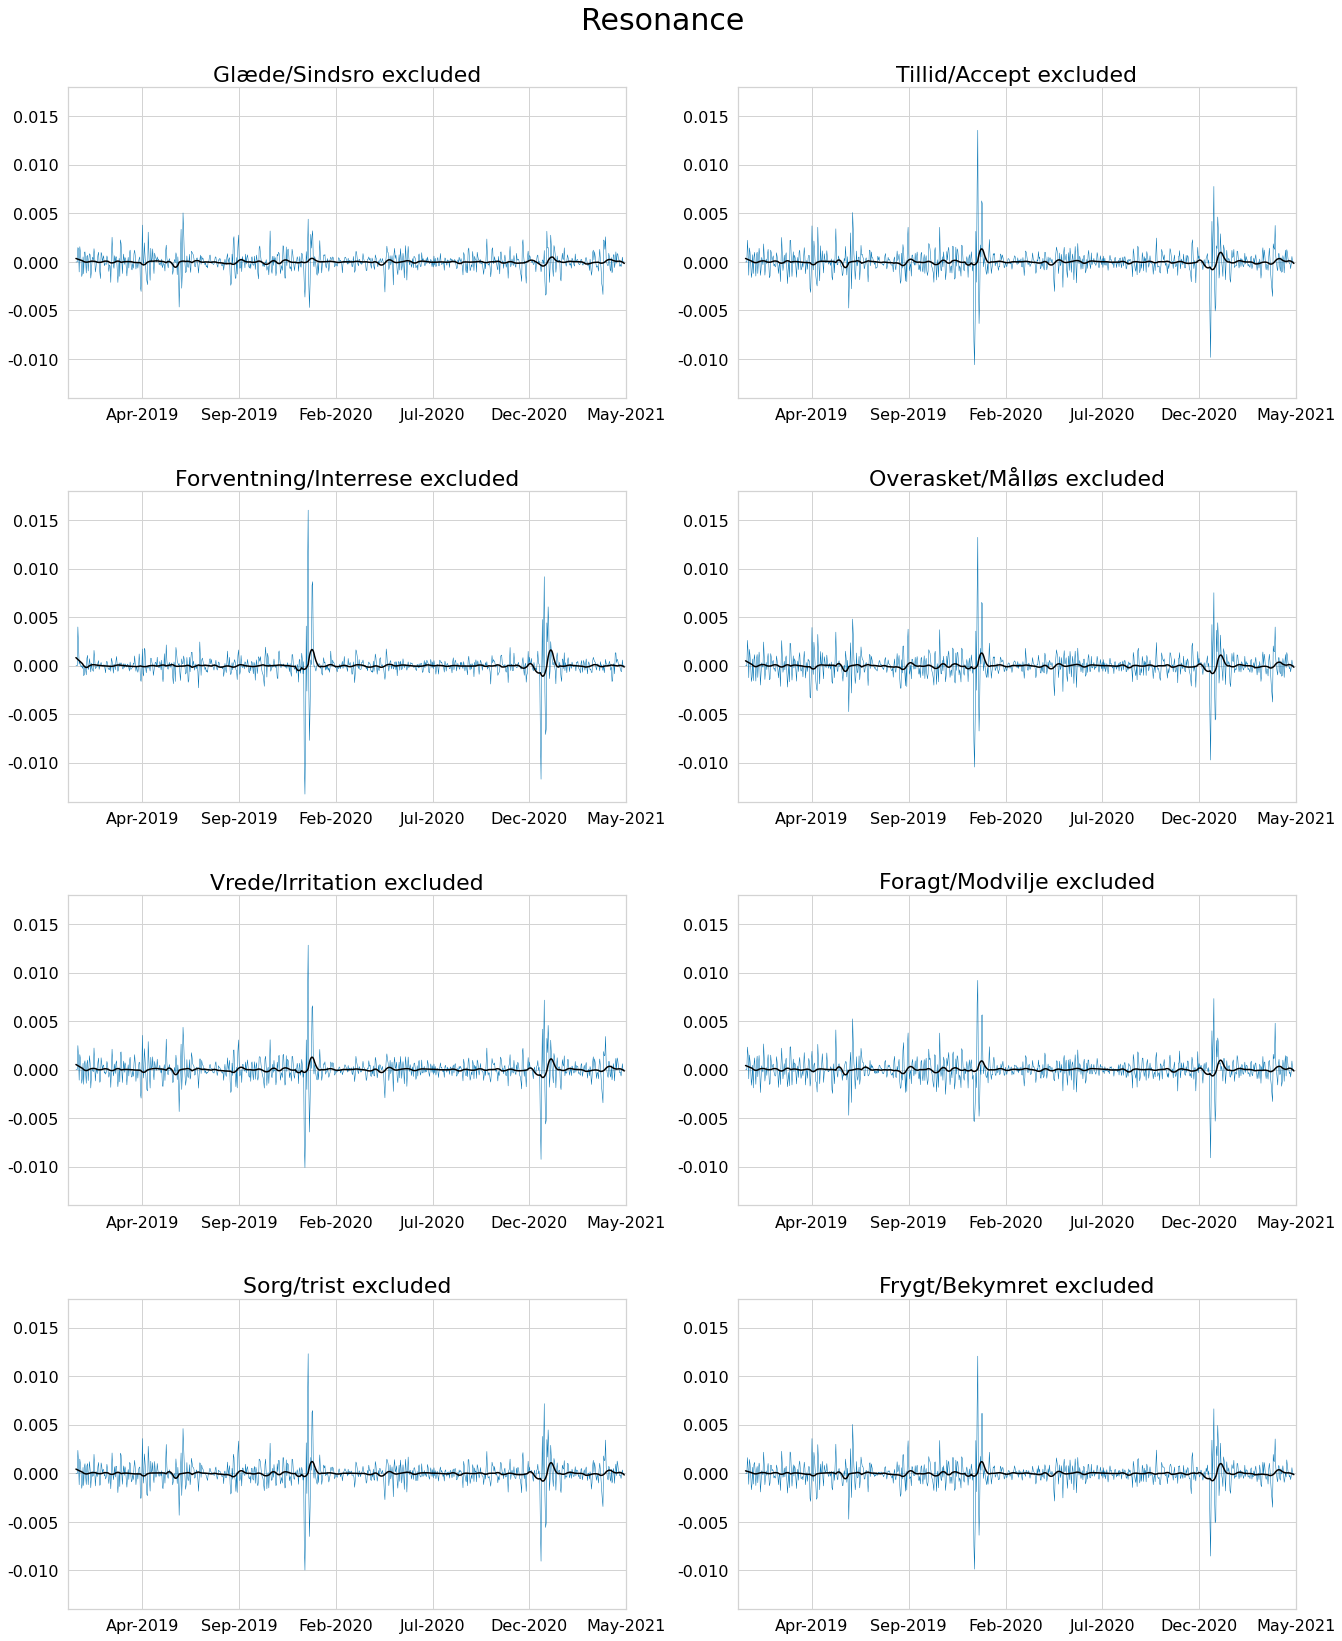

In [22]:
measure = "resonance"

plot_all_excluded(all_emo_dfs, 
                  measure, 
                  ymin=-0.014, 
                  ymax=0.018, 
                  labels=labels,
                #   plot_name=f"../fig/excl_emos_{measure}_long.png"
                  )